In [262]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [263]:
df=pd.read_csv(r"C:\Data Backup\Python\Machine Learning 1\Logistics Regression  - Classification\Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df['Prospect ID'].head(1)

0    7927b2df-8bba-4d29-b9a2-b6e0beafe620
Name: Prospect ID, dtype: object

In [264]:
df.shape

(9240, 37)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [266]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,9b7ac744-aa49-4b69-b286-6432332984c3,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [267]:
(df.isnull().sum()/len(df.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [268]:
#Removing columns with more than 40% null values except "Lead Quality". Moreover these columns does not contain important information needed for analysis.
df=df.drop(['Magazine','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score',],axis=1)
df.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,No,No,Email Opened


In [269]:
# Analysing the relevance of column "Lead Quality" by checking the type of values it has:
df['Lead Quality'].value_counts(normalize='True')

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: Lead Quality, dtype: float64

##### from the above result, we can replace the missing values of "Lead Quality" with "Not Sure"


In [270]:
# imputing NULL values of 'Lead Quality' column with "Not Sure" value
df['Lead Quality'] = df['Lead Quality'].fillna('Not Sure')
df['Lead Quality'].value_counts(normalize='True')

Not Sure             0.634091
Might be             0.168831
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: Lead Quality, dtype: float64

In [271]:

df['Lead Origin'].value_counts(normalize='True')

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [272]:
print(df['Get updates on DM Content'].value_counts(normalize='True'))
print(df['Receive More Updates About Our Courses'].value_counts(normalize='True'))
print(df['Update me on Supply Chain Content'].value_counts(normalize='True'))
print(df['I agree to pay the amount through cheque'].value_counts(normalize='True'))

No    1.0
Name: Get updates on DM Content, dtype: float64
No    1.0
Name: Receive More Updates About Our Courses, dtype: float64
No    1.0
Name: Update me on Supply Chain Content, dtype: float64
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64


In [273]:
#### We can delete column 'Get updates on DM Content', 'Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque' as it has common value for all rows:

df.drop(['Get updates on DM Content','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
df.shape

(9240, 28)

In [274]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,No,Modified


In [275]:
df['Lead Profile'].value_counts(normalize='True')*100
# Here removing column 'Lead Profile' as 63% is unknown. 
#It cant be considered for analysis as merginf with other column like pecifying it as "other leads" will increse skewness.
df=df.drop('Lead Profile',axis=1)

In [276]:
print(df['How did you hear about X Education'].value_counts(normalize='True')*100)

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64


##### Column "How did you hear about X Education" has more than 70% value as Select, which logically cannot be replaced with any other value. Hence removing this column finding it irrelevant.

In [277]:
df=df.drop('How did you hear about X Education',axis=1)

In [278]:
df['Specialization'].value_counts(normalize='True')*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

#### Replacing the value "Select" in 'Specialization' column by "Others" as it cannot be merged with other value and Select doesn't seems that it can be renamed with any specific specialization.. Hence renaming it as "Others"

In [279]:
df['Specialization']=df['Specialization'].str.replace("Select","No Specialization")
df['Specialization'].fillna("No Specialization",inplace=True)

In [280]:
df['City'].value_counts(normalize='True')*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

#### replacing the above Select value of column "City" with median value ie "Mumbai" in this case as other places are also mainly of nearby region:

In [281]:
df['City']=df['City'].replace('Select','Mumbai')
df['City'].fillna('Other Cities',inplace=True)
df['City'].value_counts(normalize='True')*100

Mumbai                         59.209957
Other Cities                   22.792208
Thane & Outskirts               8.138528
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [282]:
df['Lead Source'].value_counts(normalize='True')*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Press_Release         0.021730
Social Media          0.021730
NC_EDM                0.010865
youtubechannel        0.010865
WeLearn               0.010865
testone               0.010865
Pay per Click Ads     0.010865
blog                  0.010865
welearnblog_Home      0.010865
Name: Lead Source, dtype: float64

In [283]:
#### Here we can see that there are 2 diff. values for google.. (different by spelling). Hence renaming:
# df['Lead Source'] had null values, imputed those values by Mode value
df['Lead Source']=df['Lead Source'].str.replace("google","Google")
df['Lead Source'].fillna('Google',inplace=True)
df['Lead Source'].isnull().sum 

#imputing column "country" with Mode value
country_mode=df['Country'].mode()
df['Country']=df['Country'].fillna('India')

In [284]:
print(df['What is your current occupation'].value_counts(normalize='True')*100)
print ("---------------------------------------------------")
print (df['What matters most to you in choosing a course'].value_counts(normalize='True')*100)

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64
---------------------------------------------------
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64


In [285]:
#Deleting above 3 columns "What is your current occupation","What matters most to you in choosing a course" as it is highly imbalanced:
df=df.drop(["What matters most to you in choosing a course",'What is your current occupation'],axis=1)

In [286]:
# in this dataset, we have 2 columns as "Last Activity" and "Last Notable Activity". Retaining one column among it.
df['Last Notable Activity'].value_counts(normalize='True')*100
df=df.drop('Last Activity',axis=1)

# Removing column "Tags", it has around 40% null values and not seeming to be very relevant according to the content present:
df=df.drop('Tags',axis=1)

In [287]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [288]:
print(df['TotalVisits'].mode())
print(df['Page Views Per Visit'].mode())

df['TotalVisits'].fillna(0.0,inplace=True)
df['Page Views Per Visit'].fillna(0.0,inplace=True)

0    0.0
dtype: float64
0    0.0
dtype: float64


In [289]:
(df.isnull().sum()/len(df.index))*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Country                                   0.0
Specialization                            0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Lead Quality                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

## Univariate Analysis- Categorical Variable

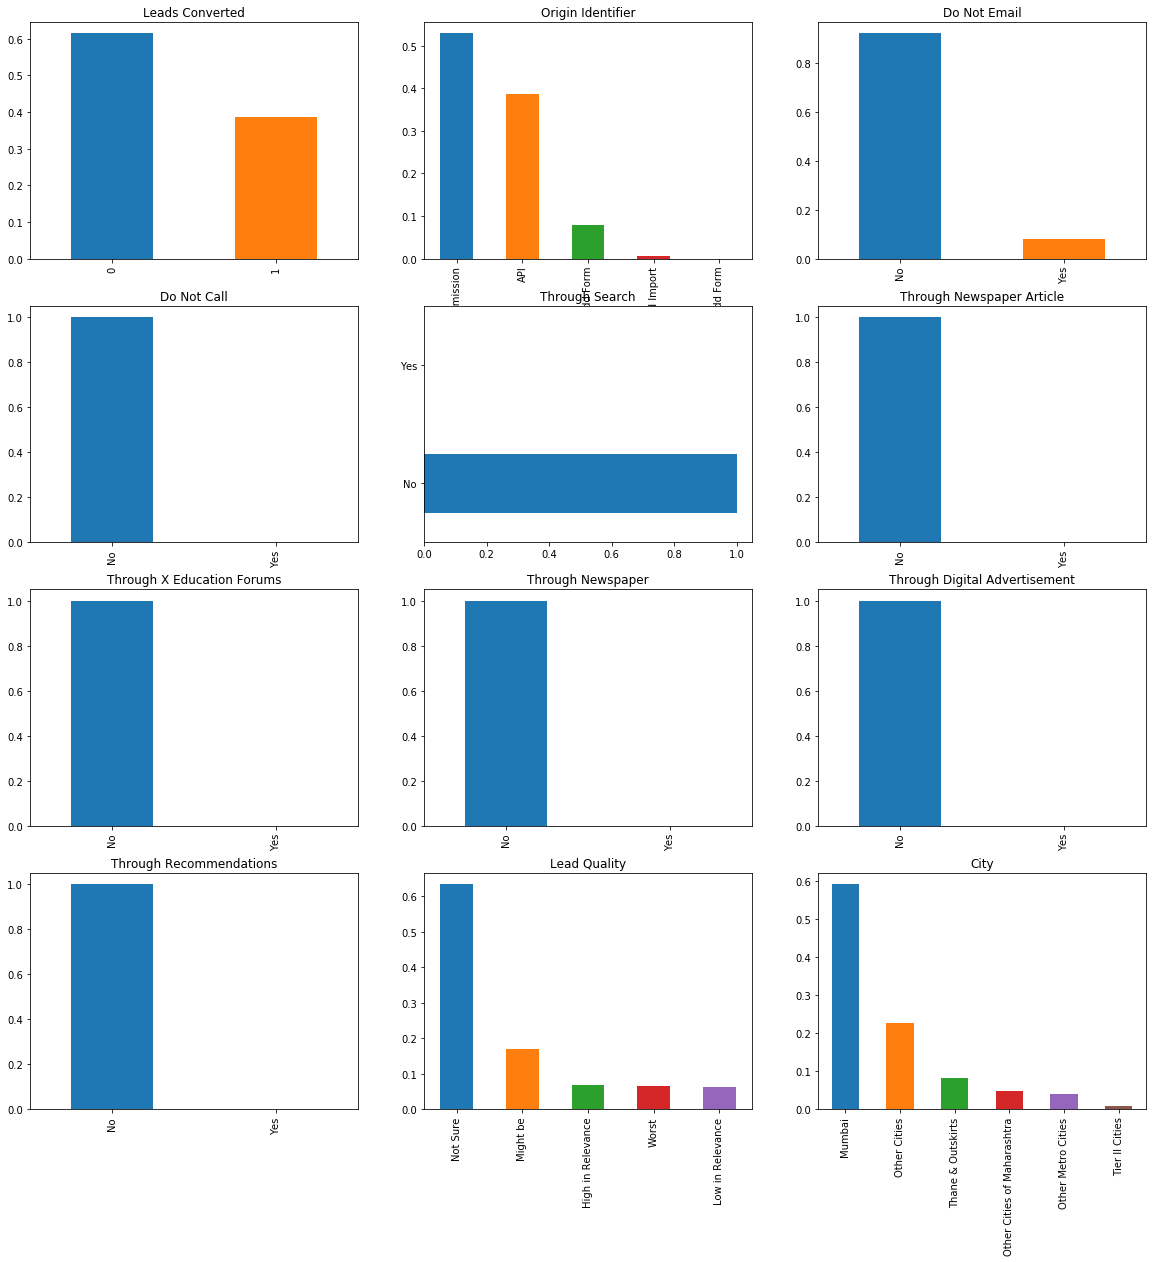

In [290]:
plt.subplots(2,2,figsize=(20,20))

plt.subplot(4,3,1)
plt.title('Leads Converted')
df.Converted.value_counts(normalize=True).plot.bar()

plt.subplot(4,3,2)
plt.title('Origin Identifier')
df['Lead Origin'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,3)
plt.title('Do Not Email')
df['Do Not Email'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,4)
plt.title('Do Not Call')
df['Do Not Call'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,5)
plt.title('Through Search')
df.Search.value_counts(normalize=True).plot.barh()

plt.subplot(4,3,6)
plt.title('Through Newspaper Article')
df['Newspaper Article'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,7)
plt.title('Through X Education Forums')
df['X Education Forums'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,8)
plt.title('Through Newspaper')
df['Newspaper'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,9)
plt.title('Through Digital Advertisement')
df['Digital Advertisement'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,10)
plt.title('Through Recommendations')
df['Through Recommendations'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,11)
plt.title('Lead Quality')
df['Lead Quality'].value_counts(normalize=True).plot.bar()

plt.subplot(4,3,12)
plt.title('City')
df.City.value_counts(normalize=True).plot.bar()

plt.show()

#### From the above Visualization, we can see that columns:'Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations' are highly skewed. Hence dropping.

In [291]:
df=df.drop(['Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'],axis=1)

## Univariate Analysis- Continuous Variable

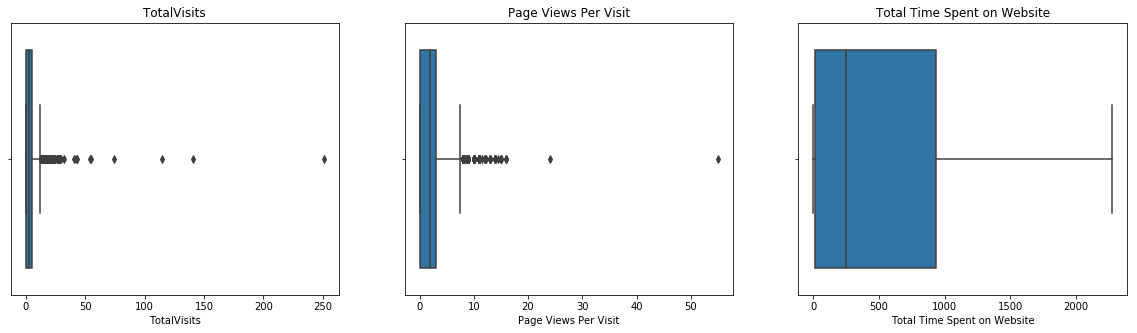

In [292]:
plt.subplots(2,2,figsize=(20,5))

plt.subplot(1,3,1)
plt.title('TotalVisits')
sns.boxplot(x=df.TotalVisits)

plt.subplot(1,3,2)
plt.title('Page Views Per Visit')
sns.boxplot(x=df['Page Views Per Visit'])

plt.subplot(1,3,3)
plt.title('Total Time Spent on Website')
sns.boxplot(x=df['Total Time Spent on Website'])

plt.show()

In [293]:
# Handling outlier by CAPPING it

df.loc[df.TotalVisits>df.TotalVisits.quantile(.98),"TotalVisits"]=df.TotalVisits.quantile(.98)
df.loc[df['Page Views Per Visit']>df['Page Views Per Visit'].quantile(.98),"Page Views Per Visit"]=df['Page Views Per Visit'].quantile(.98)


print (df['Page Views Per Visit'].quantile([.75,.90,.95,.98,.99,1]))
print ("----------------------------------------------------------")
print (df.TotalVisits.quantile([.75,.90,.95,.98,.99,1]))
print ("----------------------------------------------------------")
print (df['Total Time Spent on Website'].quantile([.75,.90,.95,.98,.99,1]))
print ("----------------------------------------------------------")



0.75    3.0
0.90    5.0
0.95    6.0
0.98    8.0
0.99    8.0
1.00    8.0
Name: Page Views Per Visit, dtype: float64
----------------------------------------------------------
0.75     5.0
0.90     7.0
0.95    10.0
0.98    13.0
0.99    13.0
1.00    13.0
Name: TotalVisits, dtype: float64
----------------------------------------------------------
0.75     936.00
0.90    1380.00
0.95    1562.00
0.98    1734.00
0.99    1840.61
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64
----------------------------------------------------------


## Bivariate Analysis: Categorical vs Categorical variable

### wrt Target variable "Converted"

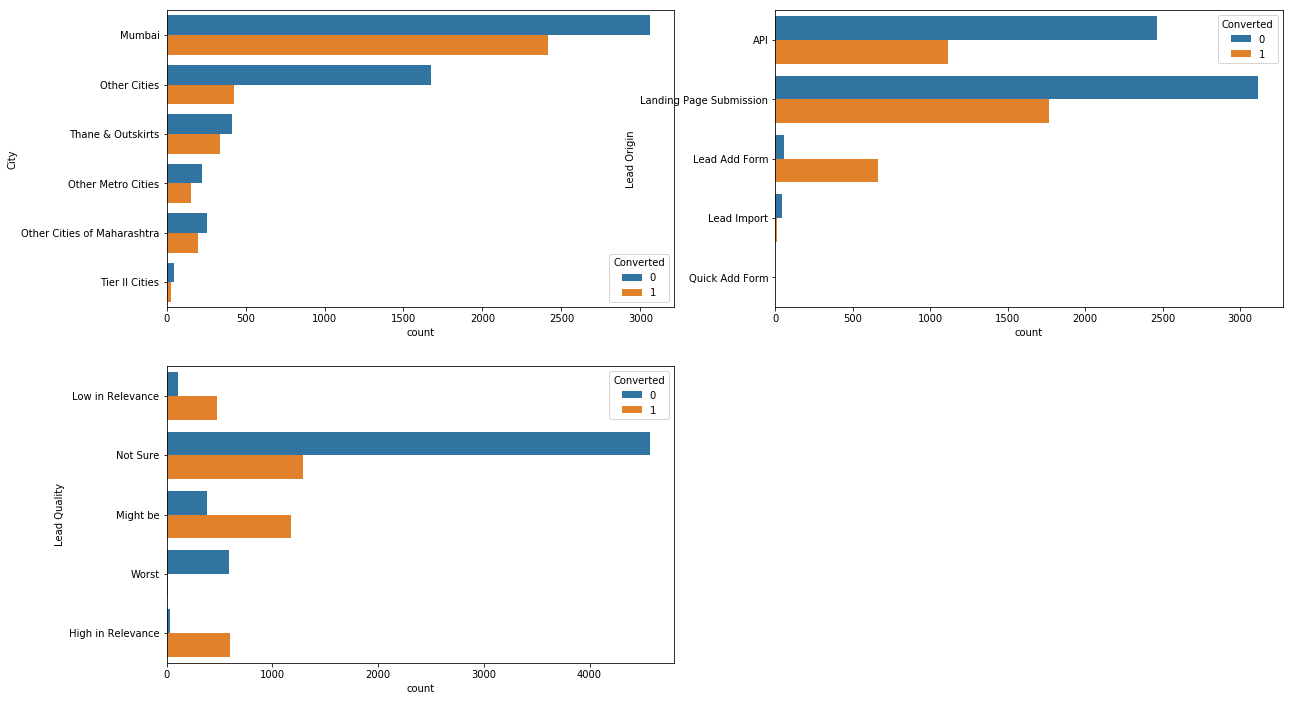

In [294]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(y = 'City', hue = 'Converted', data = df)

plt.subplot(2,2,2)
sns.countplot(y = 'Lead Origin', hue = 'Converted', data = df)

plt.subplot(2,2,3)
sns.countplot(y = 'Lead Quality', hue = 'Converted', data = df)

plt.show()

## Bivariate Analysis: Continuous vs Continuous variable

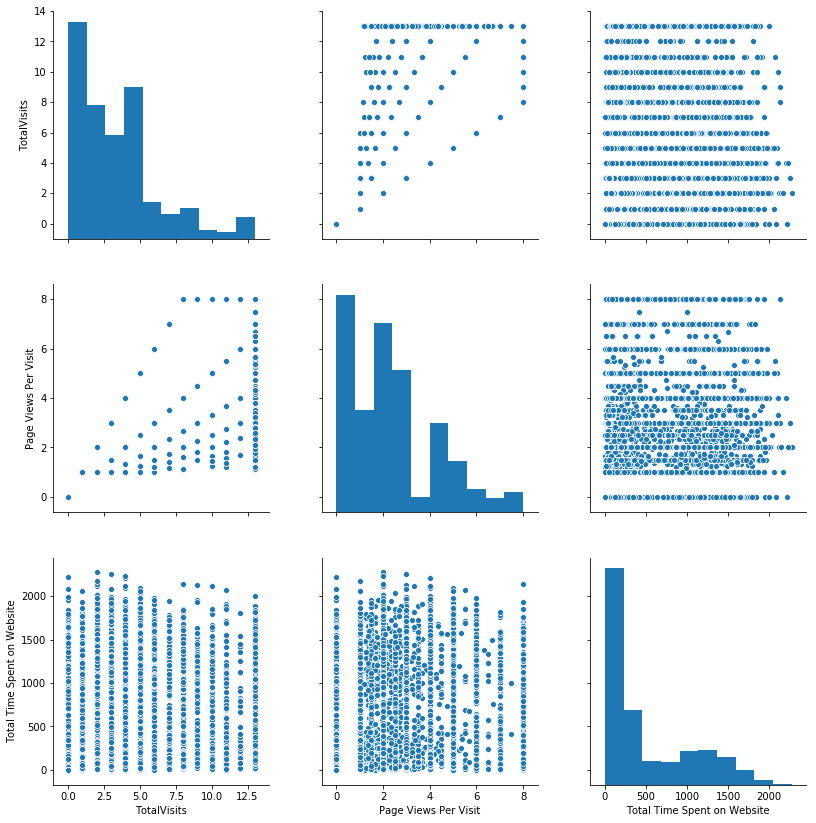

In [295]:
# plt.figure(figsize=(12,12))
continuous=df[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]
g=sns.pairplot(continuous)
g.fig.set_size_inches(12,12)

## Multivariate Analysis

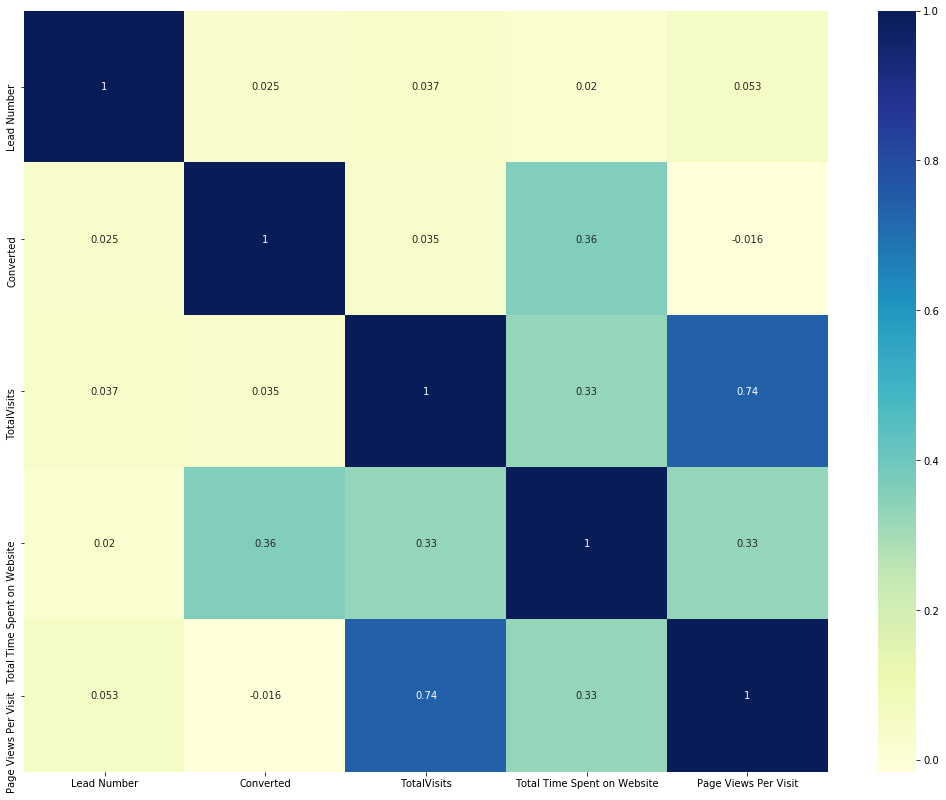

In [296]:
plt.figure(figsize = (18, 14))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [297]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Country', 'Specialization', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [298]:
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,India,No Specialization,Low in Relevance,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,India,No Specialization,Not Sure,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,No Specialization,Might be,Mumbai,No,Modified


In [299]:
##Creating Dummy Variables

# Creating dummy variables for the remaining categorical variables and dropping the level with big names.
print(df['Lead Origin'].value_counts())
ml = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)

print(df['Lead Source'].value_counts())
ml = pd.get_dummies(df['Lead Source'], prefix='Lead Source', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)

print(df['Country'].value_counts())
ml = pd.get_dummies(df['Country'], prefix='Country', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)

print(df['Specialization'].value_counts())
ml = pd.get_dummies(df['Specialization'], prefix='Specialization', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)


print(df['Lead Quality'].value_counts())
ml = pd.get_dummies(df['Lead Quality'], prefix='Lead Quality', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)

print(df['City'].value_counts())
ml = pd.get_dummies(df['City'], prefix='City', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)


print(df['A free copy of Mastering The Interview'].value_counts())
ml = pd.get_dummies(df['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)


print(df['Last Notable Activity'].value_counts())
ml = pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity', drop_first = True)
print(ml.head())
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  
0                        0                           0  
1                        0                           0  
2                        0                           0  
3                        0                           0  
4                        0                           0  
Google               2909
Direct Traffic       2543

In [300]:
df = df.drop(['Lead Origin','Lead Source','Country','Specialization','Lead Quality','City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [301]:
df.head()
df.shape

(9240, 109)

In [302]:
df.isnull().sum()

Prospect ID                                           0
Lead Number                                           0
Converted                                             0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_Landing Page Submission                   0
Lead Origin_Lead Add Form                             0
Lead Origin_Lead Import                               0
Lead Origin_Quick Add Form                            0
Lead Source_Direct Traffic                            0
Lead Source_Facebook                                  0
Lead Source_Google                                    0
Lead Source_Live Chat                                 0
Lead Source_NC_EDM                                    0
Lead Source_Olark Chat                                0
Lead Source_Organic Search                            0
Lead Source_Pay per Click Ads                   

### Step 4: Test-Train Split

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
# Putting feature variable to X
X = df.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [305]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [306]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No Specialization,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.054996,-0.885371,-1.171392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.254612,0.005716,-0.486490,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.582014,-0.691418,0.116018,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.582014,1.365219,1.403428,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,-1.054996,-0.885371,-1.171392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [308]:
### Checking the Converted Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

### We have almost 39% converted rate

## Feature Selection Using RFE

In [309]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

rfe.support_


array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False])

In [310]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 58),
 ('Lead Origin_Quick Add Form', False, 48),
 ('Lead Source_Direct Traffic', False, 35),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 57),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', False, 75),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_WeLearn', False, 55),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 7),
 ('Lead Source_blog', False, 47),
 ('Lead Source_testone', False, 83),
 ('Lead Source_welearnblog_Home', False,

In [311]:
col = X_train.columns[rfe.support_]
print(type(col))

<class 'pandas.core.indexes.base.Index'>


In [312]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Country_Australia', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Belgium', 'Country_Canada',
       'Country_China', 'Country_Denmark', 'Country_France', 'Country_Germany',
       'Country_Ghana', 'Country_Hong Kong', 'Country_India',
       'Country_Indonesia', 'Country_Italy', 'Country_Kenya', 'Country_Kuwait',
       'Country_Liberia', 'Country_Malaysia

### Assessing the model with StatsModels

In [313]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2287.8
Date:                Mon, 20 Jul 2020   Deviance:                       4575.6
Time:                        22:04:34   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4776      0.131     11.260      0.000       1.220       1.735
Total Time Spent on Website                        1.0811      0.043     24.921      0.000       0.996       1.166
Lead Origin_Lead Add Form                          2.7494      0.204     13.508      0.000       2.350       3.148
Lead Source_NC_EDM                                23.5945   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                             1.3075      0.110     11.898      0.000       1.092       1.523
Lead Source_Welingak Website                       3.4891      0.749      4.656      0.000       2.020       4.958
Country_Netherlands                               -2.2631      1.661     -1.362      0.173      -5.519       0.993
Country_Qatar                                    -21.6999   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Country_Saudi Arabia                              -2.0869      0.805     -2.591      0.010      -3.665      -0.508
Country_South Africa                               1.4815      1.163      1.274      0.203      -0.798       3.761
Specialization_Hospitality Management             -1.0099      0.366     -2.762      0.006      -1.727      -0.293
Lead Quality_Might be                             -1.4221      0.151     -9.431      0.000      -1.718      -1.127
Lead Quality_Not Sure                             -3.3905      0.135    -25.137      0.000      -3.655      -3.126
Lead Quality_Worst                                -5.3420      0.364    -14.670      0.000      -6.056      -4.628
Last Notable Activity_Email Bounced               -0.7492      0.552     -1.358      0.174      -1.830       0.332
Last Notable Activity_Had a Phone Conversation     2.2143      1.230      1.800      0.072      -0.197       4.626
Last Notable Activity_Modified                    -0.6668      0.093     -7.171      0.000      -0.849      -0.485
Last Notable Activity_Olark Chat Conversation     -1.1255      0.349     -3.226      0.001      -1.809      -0.442
Last Notable Activity_Resubscribed to emails      24.1286   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                     1.3470      0.094     14.322      0.000       1.163       1.531
Last Notable Activity_Unreachable                  1.3795      0.610      2.263      0.024       0.185       2.574
==================================================================================================================
"""

### As we can see that the P-value of Last Notable Activity_Resubscribed to emails has value equal to 1 which is more than .05 so removing the column

In [314]:
col1=col.drop(labels='Last Notable Activity_Resubscribed to emails')
print(col1)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Country_Netherlands', 'Country_Qatar',
       'Country_Saudi Arabia', 'Country_South Africa',
       'Specialization_Hospitality Management', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [315]:
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2289.5
Date:                Mon, 20 Jul 2020   Deviance:                       4579.1
Time:                        22:04:34   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4786      0.131     11.266      0.000       1.221       1.736
Total Time Spent on Website                        1.0808      0.043     24.918      0.000       0.996       1.166
Lead Origin_Lead Add Form                          2.7499      0.204     13.510      0.000       2.351       3.149
Lead Source_NC_EDM                                23.5923   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                             1.3128      0.110     11.955      0.000       1.098       1.528
Lead Source_Welingak Website                       3.4884      0.749      4.656      0.000       2.020       4.957
Country_Netherlands                               -2.2628      1.662     -1.362      0.173      -5.520       0.994
Country_Qatar                                    -21.7010   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Country_Saudi Arabia                              -2.0875      0.805     -2.592      0.010      -3.666      -0.509
Country_South Africa                               1.4813      1.163      1.273      0.203      -0.799       3.761
Specialization_Hospitality Management             -1.0096      0.366     -2.762      0.006      -1.726      -0.293
Lead Quality_Might be                             -1.4214      0.151     -9.426      0.000      -1.717      -1.126
Lead Quality_Not Sure                             -3.3891      0.135    -25.126      0.000      -3.653      -3.125
Lead Quality_Worst                                -5.3423      0.364    -14.671      0.000      -6.056      -4.629
Last Notable Activity_Email Bounced               -0.7516      0.551     -1.363      0.173      -1.832       0.329
Last Notable Activity_Had a Phone Conversation     2.2124      1.230      1.798      0.072      -0.199       4.624
Last Notable Activity_Modified                    -0.6702      0.093     -7.210      0.000      -0.852      -0.488
Last Notable Activity_Olark Chat Conversation     -1.1315      0.349     -3.244      0.001      -1.815      -0.448
Last Notable Activity_SMS Sent                     1.3440      0.094     14.296      0.000       1.160       1.528
Last Notable Activity_Unreachable                  1.3767      0.610      2.258      0.024       0.182       2.572
==================================================================================================================
"""

### As we can see that the P-value of Lead Source_NC_EDM to emails has value equal to 1 which is more than .05 so removing the column

In [316]:
col2=col1.drop(labels='Lead Source_NC_EDM')
print(col2)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Netherlands', 'Country_Qatar', 'Country_Saudi Arabia',
       'Country_South Africa', 'Specialization_Hospitality Management',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [317]:
X_train_sm = sm.add_constant(X_train[col2])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2290.9
Date:                Mon, 20 Jul 2020   Deviance:                       4581.7
Time:                        22:04:35   Pearson chi2:                 6.48e+03
No. Iterations:                    21   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4800      0.131     11.276      0.000       1.223       1.737
Total Time Spent on Website                        1.0812      0.043     24.929      0.000       0.996       1.166
Lead Origin_Lead Add Form                          2.7498      0.204     13.512      0.000       2.351       3.149
Lead Source_Olark Chat                             1.3116      0.110     11.947      0.000       1.096       1.527
Lead Source_Welingak Website                       3.4872      0.749      4.654      0.000       2.019       4.956
Country_Netherlands                               -2.2646      1.662     -1.363      0.173      -5.522       0.993
Country_Qatar                                    -21.7042   1.46e+04     -0.001      0.999   -2.87e+04    2.86e+04
Country_Saudi Arabia                              -2.0881      0.805     -2.593      0.010      -3.667      -0.510
Country_South Africa                               1.4796      1.163      1.272      0.203      -0.800       3.759
Specialization_Hospitality Management             -1.0107      0.366     -2.765      0.006      -1.727      -0.294
Lead Quality_Might be                             -1.4208      0.151     -9.422      0.000      -1.716      -1.125
Lead Quality_Not Sure                             -3.3871      0.135    -25.114      0.000      -3.651      -3.123
Lead Quality_Worst                                -5.3425      0.364    -14.670      0.000      -6.056      -4.629
Last Notable Activity_Email Bounced               -0.7544      0.551     -1.368      0.171      -1.835       0.326
Last Notable Activity_Had a Phone Conversation     2.2101      1.230      1.797      0.072      -0.201       4.621
Last Notable Activity_Modified                    -0.6728      0.093     -7.241      0.000      -0.855      -0.491
Last Notable Activity_Olark Chat Conversation     -1.1337      0.349     -3.251      0.001      -1.817      -0.450
Last Notable Activity_SMS Sent                     1.3412      0.094     14.272      0.000       1.157       1.525
Last Notable Activity_Unreachable                  1.3740      0.609      2.254      0.024       0.179       2.569
==================================================================================================================
"""

In [318]:
##Country_Qatar is having .99 p value so removing the column
col3=col2.drop(labels='Country_Qatar')
print(col3)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Netherlands', 'Country_Saudi Arabia', 'Country_South Africa',
       'Specialization_Hospitality Management', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [319]:
X_train_sm = sm.add_constant(X_train[col3])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2293.6
Date:                Mon, 20 Jul 2020   Deviance:                       4587.1
Time:                        22:04:35   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4781      0.131     11.266      0.000       1.221       1.735
Total Time Spent on Website                        1.0791      0.043     24.922      0.000       0.994       1.164
Lead Origin_Lead Add Form                          2.7492      0.204     13.509      0.000       2.350       3.148
Lead Source_Olark Chat                             1.3131      0.110     11.964      0.000       1.098       1.528
Lead Source_Welingak Website                       3.4892      0.749      4.657      0.000       2.021       4.958
Country_Netherlands                               -2.2578      1.662     -1.358      0.174      -5.516       1.000
Country_Saudi Arabia                              -2.0857      0.805     -2.590      0.010      -3.664      -0.507
Country_South Africa                               1.4822      1.163      1.274      0.203      -0.798       3.762
Specialization_Hospitality Management             -1.0069      0.366     -2.754      0.006      -1.723      -0.290
Lead Quality_Might be                             -1.4203      0.151     -9.421      0.000      -1.716      -1.125
Lead Quality_Not Sure                             -3.3904      0.135    -25.145      0.000      -3.655      -3.126
Lead Quality_Worst                                -5.3413      0.364    -14.672      0.000      -6.055      -4.628
Last Notable Activity_Email Bounced               -0.7497      0.551     -1.360      0.174      -1.830       0.331
Last Notable Activity_Had a Phone Conversation     2.2125      1.230      1.798      0.072      -0.199       4.624
Last Notable Activity_Modified                    -0.6690      0.093     -7.203      0.000      -0.851      -0.487
Last Notable Activity_Olark Chat Conversation     -1.1304      0.349     -3.242      0.001      -1.814      -0.447
Last Notable Activity_SMS Sent                     1.3419      0.094     14.291      0.000       1.158       1.526
Last Notable Activity_Unreachable                  1.3773      0.610      2.259      0.024       0.182       2.572
==================================================================================================================
"""

In [320]:

##Country_South Africa is having .20 p value so removing the column
col4=col3.drop(labels='Country_South Africa')
print(col4)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Netherlands', 'Country_Saudi Arabia',
       'Specialization_Hospitality Management', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [321]:
X_train_sm = sm.add_constant(X_train[col4])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2294.2
Date:                Mon, 20 Jul 2020   Deviance:                       4588.4
Time:                        22:04:35   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4784      0.131     11.269      0.000       1.221       1.736
Total Time Spent on Website                        1.0785      0.043     24.913      0.000       0.994       1.163
Lead Origin_Lead Add Form                          2.7477      0.203     13.504      0.000       2.349       3.146
Lead Source_Olark Chat                             1.3104      0.110     11.947      0.000       1.095       1.525
Lead Source_Welingak Website                       3.4880      0.749      4.655      0.000       2.019       4.956
Country_Netherlands                               -2.2573      1.662     -1.358      0.174      -5.515       1.000
Country_Saudi Arabia                              -2.0856      0.805     -2.590      0.010      -3.664      -0.508
Specialization_Hospitality Management             -1.0074      0.365     -2.757      0.006      -1.724      -0.291
Lead Quality_Might be                             -1.4198      0.151     -9.419      0.000      -1.715      -1.124
Lead Quality_Not Sure                             -3.3885      0.135    -25.137      0.000      -3.653      -3.124
Lead Quality_Worst                                -5.3200      0.363    -14.673      0.000      -6.031      -4.609
Last Notable Activity_Email Bounced               -0.7514      0.551     -1.363      0.173      -1.832       0.329
Last Notable Activity_Had a Phone Conversation     2.2111      1.230      1.797      0.072      -0.200       4.622
Last Notable Activity_Modified                    -0.6684      0.093     -7.197      0.000      -0.850      -0.486
Last Notable Activity_Olark Chat Conversation     -1.1306      0.349     -3.243      0.001      -1.814      -0.447
Last Notable Activity_SMS Sent                     1.3406      0.094     14.280      0.000       1.157       1.525
Last Notable Activity_Unreachable                  1.3755      0.610      2.257      0.024       0.181       2.570
==================================================================================================================
"""

In [322]:
##Country_Netherlands is having .174 p value so removing the column

col5=col4.drop(labels='Country_Netherlands')
print(col5)


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'Specialization_Hospitality Management',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [323]:
X_train_sm = sm.add_constant(X_train[col5])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2295.1
Date:                Mon, 20 Jul 2020   Deviance:                       4590.1
Time:                        22:04:35   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4752      0.131     11.250      0.000       1.218       1.732
Total Time Spent on Website                        1.0767      0.043     24.895      0.000       0.992       1.161
Lead Origin_Lead Add Form                          2.7472      0.203     13.505      0.000       2.348       3.146
Lead Source_Olark Chat                             1.3095      0.110     11.942      0.000       1.095       1.524
Lead Source_Welingak Website                       3.4871      0.749      4.654      0.000       2.019       4.956
Country_Saudi Arabia                              -2.0830      0.805     -2.588      0.010      -3.660      -0.506
Specialization_Hospitality Management             -1.0047      0.365     -2.751      0.006      -1.721      -0.289
Lead Quality_Might be                             -1.4156      0.151     -9.398      0.000      -1.711      -1.120
Lead Quality_Not Sure                             -3.3853      0.135    -25.127      0.000      -3.649      -3.121
Lead Quality_Worst                                -5.3157      0.362    -14.666      0.000      -6.026      -4.605
Last Notable Activity_Email Bounced               -0.7503      0.551     -1.362      0.173      -1.830       0.330
Last Notable Activity_Had a Phone Conversation     2.2109      1.230      1.797      0.072      -0.200       4.622
Last Notable Activity_Modified                    -0.6676      0.093     -7.190      0.000      -0.850      -0.486
Last Notable Activity_Olark Chat Conversation     -1.1298      0.348     -3.243      0.001      -1.813      -0.447
Last Notable Activity_SMS Sent                     1.3382      0.094     14.260      0.000       1.154       1.522
Last Notable Activity_Unreachable                  1.3751      0.609      2.257      0.024       0.181       2.569
==================================================================================================================
"""

In [324]:

col6=col5.drop(labels='Last Notable Activity_Email Bounced')
print(col6)


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Country_Saudi Arabia', 'Specialization_Hospitality Management',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')


In [325]:
X_train_sm = sm.add_constant(X_train[col6])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.1
Date:                Mon, 20 Jul 2020   Deviance:                       4592.2
Time:                        22:04:36   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.4662      0.131     11.201      0.000       1.210       1.723
Total Time Spent on Website                        1.0760      0.043     24.886      0.000       0.991       1.161
Lead Origin_Lead Add Form                          2.7497      0.203     13.517      0.000       2.351       3.148
Lead Source_Olark Chat                             1.3109      0.110     11.956      0.000       1.096       1.526
Lead Source_Welingak Website                       3.4694      0.749      4.633      0.000       2.002       4.937
Country_Saudi Arabia                              -2.0788      0.805     -2.583      0.010      -3.656      -0.502
Specialization_Hospitality Management             -1.0217      0.367     -2.787      0.005      -1.740      -0.303
Lead Quality_Might be                             -1.4175      0.151     -9.413      0.000      -1.713      -1.122
Lead Quality_Not Sure                             -3.3871      0.135    -25.146      0.000      -3.651      -3.123
Lead Quality_Worst                                -5.3268      0.362    -14.700      0.000      -6.037      -4.617
Last Notable Activity_Had a Phone Conversation     2.2212      1.230      1.806      0.071      -0.190       4.632
Last Notable Activity_Modified                    -0.6570      0.093     -7.096      0.000      -0.838      -0.476
Last Notable Activity_Olark Chat Conversation     -1.1201      0.348     -3.215      0.001      -1.803      -0.437
Last Notable Activity_SMS Sent                     1.3490      0.094     14.415      0.000       1.166       1.532
Last Notable Activity_Unreachable                  1.3853      0.609      2.273      0.023       0.191       2.580
==================================================================================================================
"""

In [326]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.173249
6795    0.128442
3516    0.205206
8105    0.946176
3934    0.097988
4844    0.967775
3297    0.062602
8071    0.963649
987     0.127192
7423    0.971317
dtype: float64

In [327]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17324948, 0.12844179, 0.20520623, 0.94617624, 0.09798814,
       0.9677749 , 0.06260241, 0.96364901, 0.12719184, 0.97131724])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [328]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.173249,1871
1,0,0.128442,6795
2,0,0.205206,3516
3,0,0.946176,8105
4,0,0.097988,3934


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [329]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,0,0.173249,1871,0
1,0,0.128442,6795,0
2,0,0.205206,3516,0
3,0,0.946176,8105,1
4,0,0.097988,3934,0


In [330]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3638  364]
 [ 634 1832]]


In [331]:
# Predicted     not_coverted    Converted
# Actual
# not_Converted        3638        364
# Converted            634        1832  

In [332]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8457019171304886


### The accuracy is coming out to be 84%

### Checking VIFs

In [333]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [334]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Quality_Not Sure,2.17
10,Last Notable Activity_Modified,1.91
12,Last Notable Activity_SMS Sent,1.78
6,Lead Quality_Might be,1.55
2,Lead Source_Olark Chat,1.51
1,Lead Origin_Lead Add Form,1.39
3,Lead Source_Welingak Website,1.25
0,Total Time Spent on Website,1.23
8,Lead Quality_Worst,1.13
11,Last Notable Activity_Olark Chat Conversation,1.08


## From above VIF score, its clear than all the values are in range and there is no multicollinearity issue

## Metrics beyond simply accuracy

In [335]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [336]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7429034874290349

In [337]:
# Let us calculate specificity
TN / float(TN+FP)

0.9090454772613693

In [338]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09095452273863068


In [339]:
# positive predictive value 
print (TP / float(TP+FP))

0.8342440801457195


In [340]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8515917602996255


### Step 9: Plotting the ROC Curve

### An ROC curve demonstrates several things:

#### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [341]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [342]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

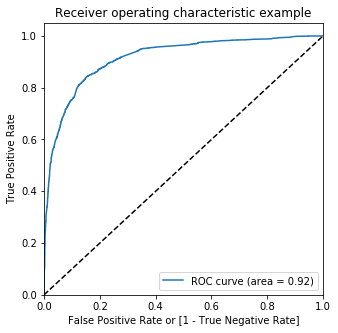

In [343]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [344]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.173249,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.128442,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.205206,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.946176,8105,1,1,1,1,1,1,1,1,1,1,1
4,0,0.097988,3934,0,1,0,0,0,0,0,0,0,0,0


In [345]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.733921  0.957015  0.596452
0.2   0.2  0.807050  0.905109  0.746627
0.3   0.3  0.833952  0.854826  0.821089
0.4   0.4  0.849103  0.816707  0.869065
0.5   0.5  0.845702  0.742903  0.909045
0.6   0.6  0.842919  0.711273  0.924038
0.7   0.7  0.827767  0.633820  0.947276
0.8   0.8  0.807514  0.540146  0.972264
0.9   0.9  0.761905  0.398621  0.985757


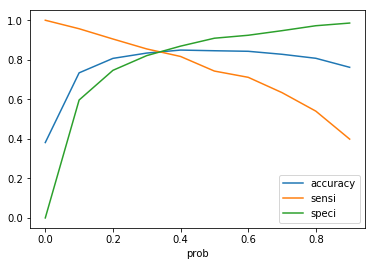

In [346]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [347]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.173249,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.128442,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.205206,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.946176,8105,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.097988,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [348]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8461657390228818

In [349]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3405,  597],
       [ 398, 2068]], dtype=int64)

In [350]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [351]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8386050283860503

In [352]:
# Let us calculate specificity
TN / float(TN+FP)

0.8508245877061469

In [353]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14917541229385306


In [354]:
# Positive predictive value 
print (TP / float(TP+FP))

0.775984990619137


In [355]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8953457796476466


### Precision and Recall

In [356]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3638,  364],
       [ 634, 1832]], dtype=int64)

##### Precision
TP / TP + FP

In [357]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8342440801457195

##### Recall
TP / TP + FN

In [358]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7429034874290349

Using sklearn utilities for the same

In [359]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

print(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8342440801457195
0.7429034874290349


### Precision and recall tradeoff

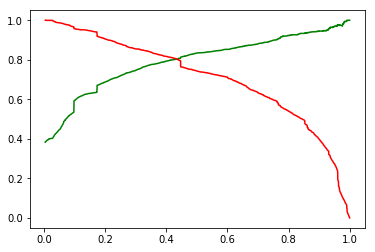

In [360]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [361]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [362]:
X_test = X_test[col6]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Country_Saudi Arabia,Specialization_Hospitality Management,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4269,0.964504,0,0,0,0,0,0,1,0,0,0,0,1,0
2376,-0.885371,1,0,0,0,0,0,0,0,0,0,0,1,0
7766,-0.777416,0,0,0,0,0,1,0,0,0,0,0,0,1
9199,-0.885371,0,1,0,0,0,0,1,0,0,1,0,0,0
4359,-0.885371,1,0,0,0,0,0,0,0,0,0,0,0,0


In [363]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [364]:
y_test_pred = res.predict(X_test_sm)

In [365]:
y_test_pred[:10]

4269    0.614405
2376    0.990167
7766    0.645085
9199    0.097988
4359    0.963142
9186    0.955528
1631    0.924698
8963    0.407011
8007    0.054507
5324    0.898208
dtype: float64

In [366]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [367]:
# Let's see the head
y_pred_1.head()

,0
4269,0.614405
2376,0.990167
7766,0.645085
9199,0.097988
4359,0.963142


In [368]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [369]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [370]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [371]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [372]:
y_pred_final.head()

,Converted,CustID,0
0,1,4269,0.614405
1,1,2376,0.990167
2,1,7766,0.645085
3,0,9199,0.097988
4,1,4359,0.963142


In [373]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [374]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

In [375]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,4269,1,0.614405
1,2376,1,0.990167
2,7766,1,0.645085
3,9199,0,0.097988
4,4359,1,0.963142


In [376]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [377]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,4269,1,0.614405,1
1,2376,1,0.990167,1
2,7766,1,0.645085,1
3,9199,0,0.097988,0
4,4359,1,0.963142,1


In [378]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8466810966810967

In [379]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1462,  215],
       [ 210,  885]], dtype=int64)

In [380]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [381]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8082191780821918

In [382]:
# Let us calculate specificity
TN / float(TN+FP)

0.8717948717948718

# Conclusion
It was found that the variables that mattered the most in the potential buyers are:
    
1. Lead Source_Welingak Website
2. Lead Origin_Lead Add Form
3. Last Notable Activity_SMS Sent
4. Lead Source_Olark Chat
5. Total Time Spent on Website

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their 
courses